# Import data and libraries 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import r2_score


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [16]:
from sklearn import set_config
set_config(display='diagram', transform_output='pandas')

In [17]:
df = pd.read_csv('concrete_data.csv')
df.sample(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
566,255.5,170.3,0.0,185.7,0.0,1026.6,724.3,28,32.05
999,150.9,0.0,183.9,166.6,11.6,991.2,772.2,28,15.57
906,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28,39.42


In [18]:
df.shape

(1030, 9)

In [19]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
X = df.drop(columns=['Strength'])
y = df.iloc[:, -1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Apply regression without any transformation
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape

(206,)

In [24]:
r2_score(y_true=y_test, y_pred=y_pred)

0.6275531792314848

In [25]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

np.float64(0.4609940491662864)

# Plotting the graph without any transformation

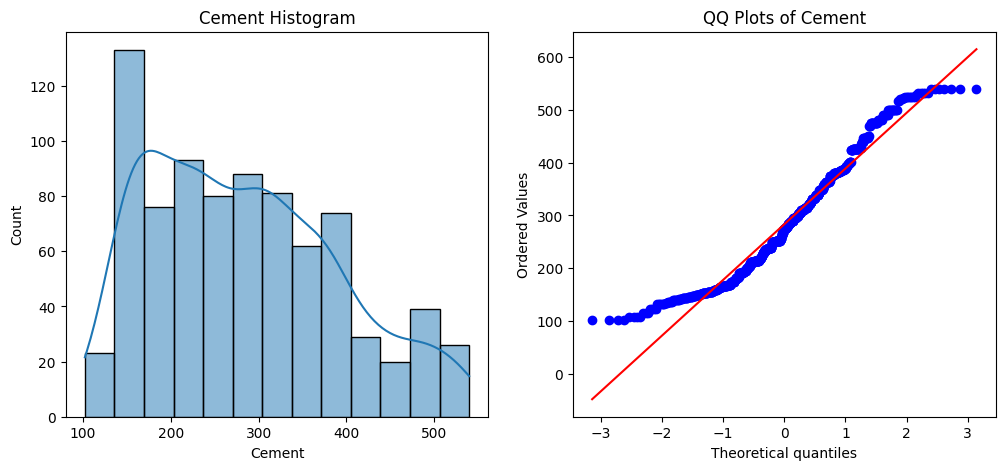

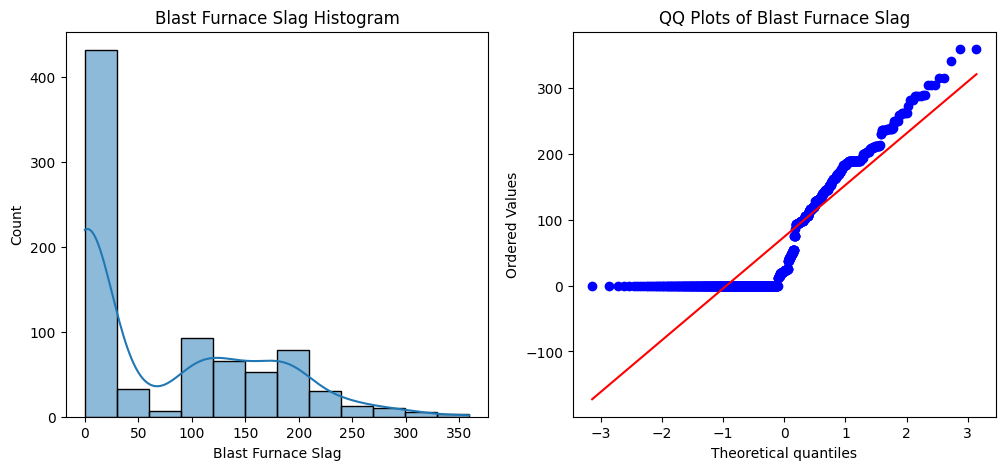

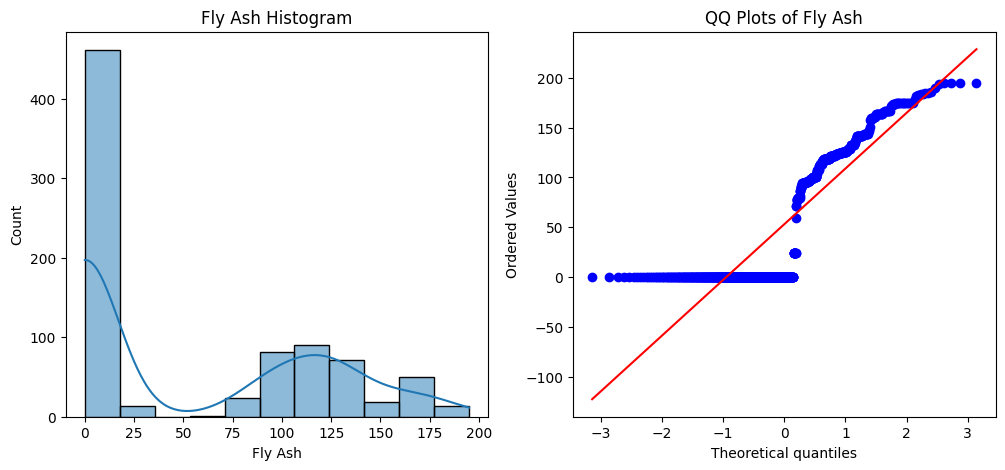

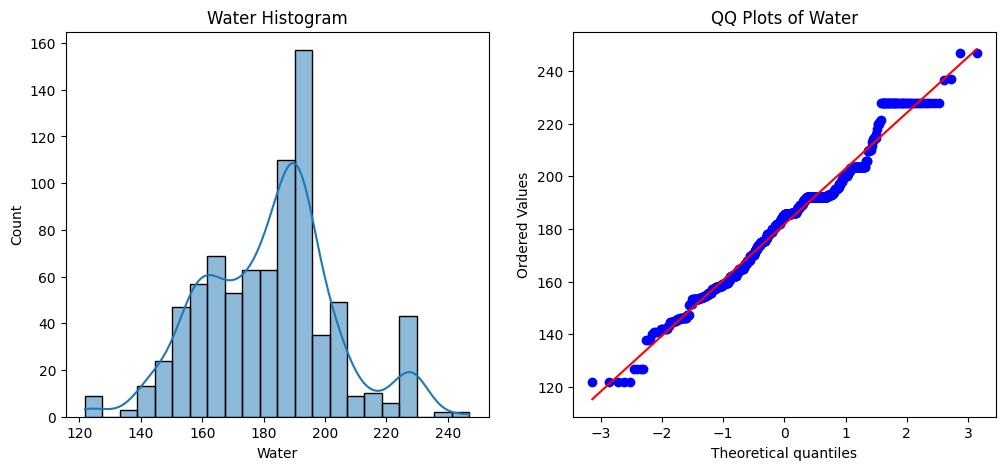

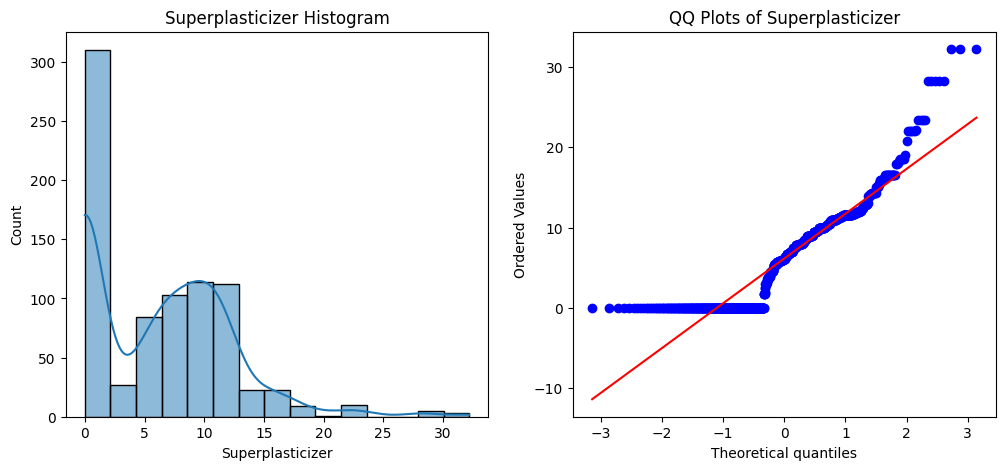

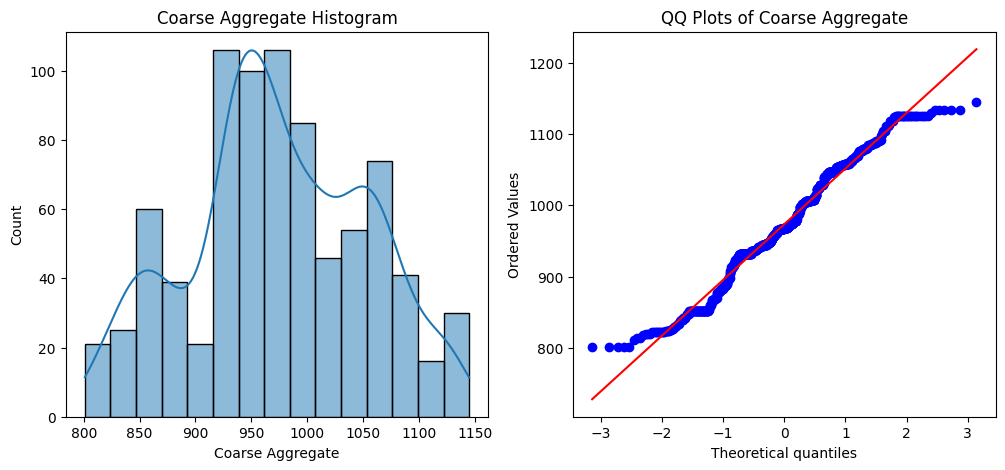

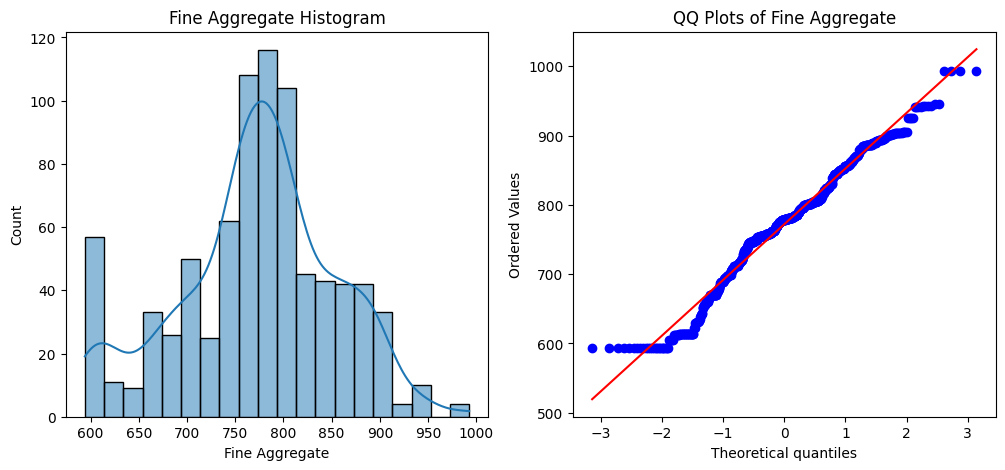

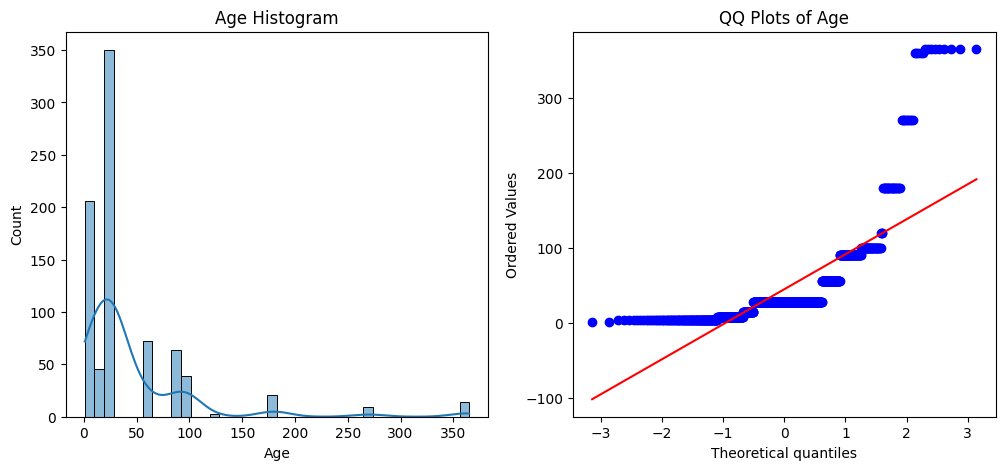

In [30]:
for  col in X_train.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"{col} Histogram")
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f"QQ Plots of {col}")
    
    plt.show()

# Applying  Box-Cox Transform

In [32]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame(
    {
        'cols': X_train_transformed.columns,
        'box-cox-lambdas' : pt.lambdas_
    }
)

,cols,box-cox-lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


 # Applying linear regression on transformed data

In [33]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)
y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test, y_pred2)


0.8047825011028632

In [34]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537935430976)

# Before and After comparison  for Box-Cox 

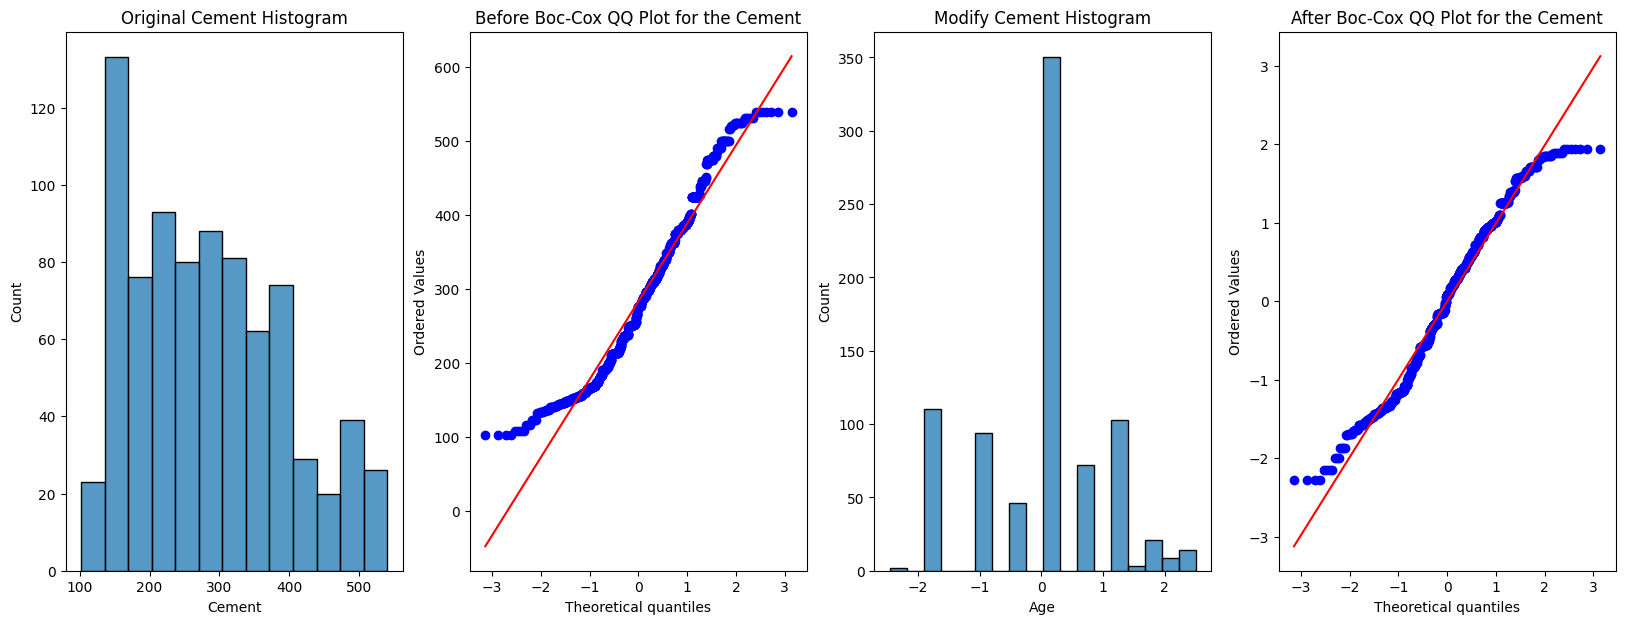

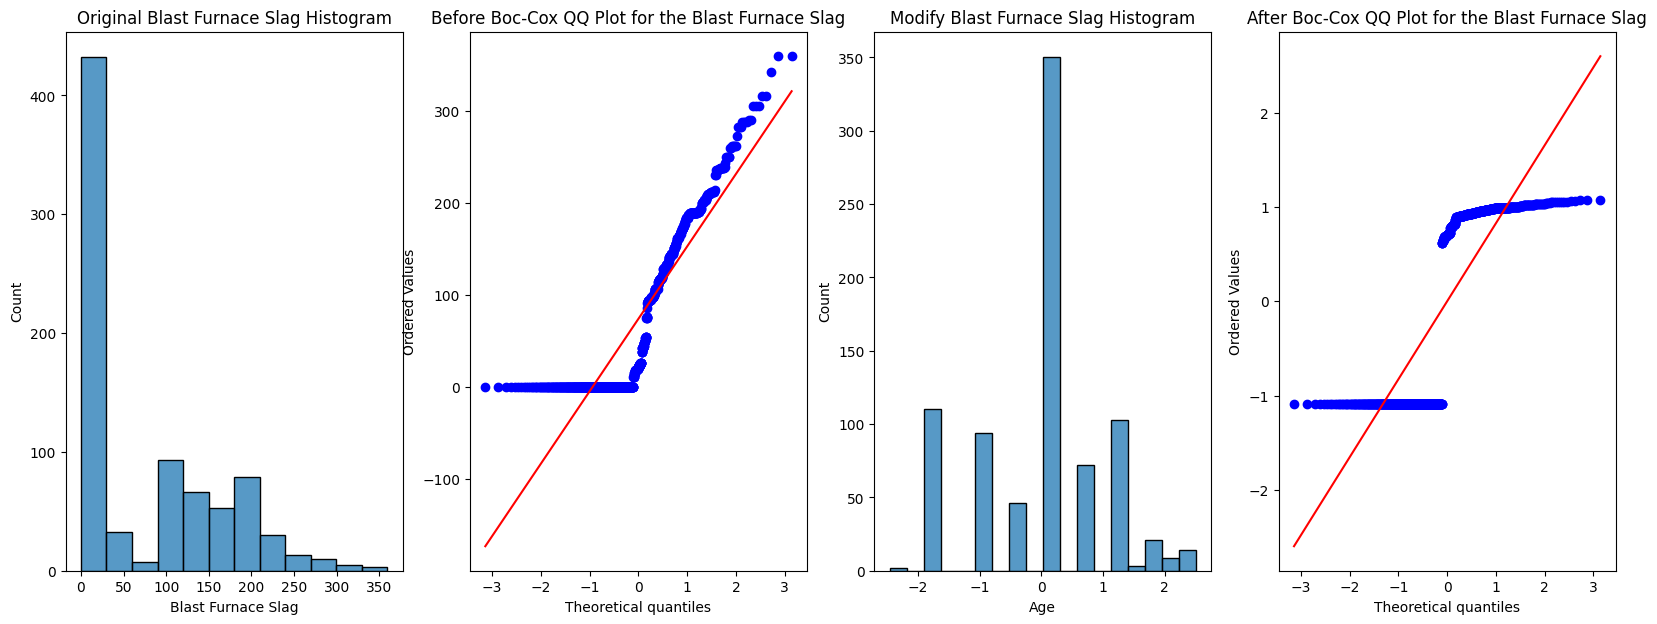

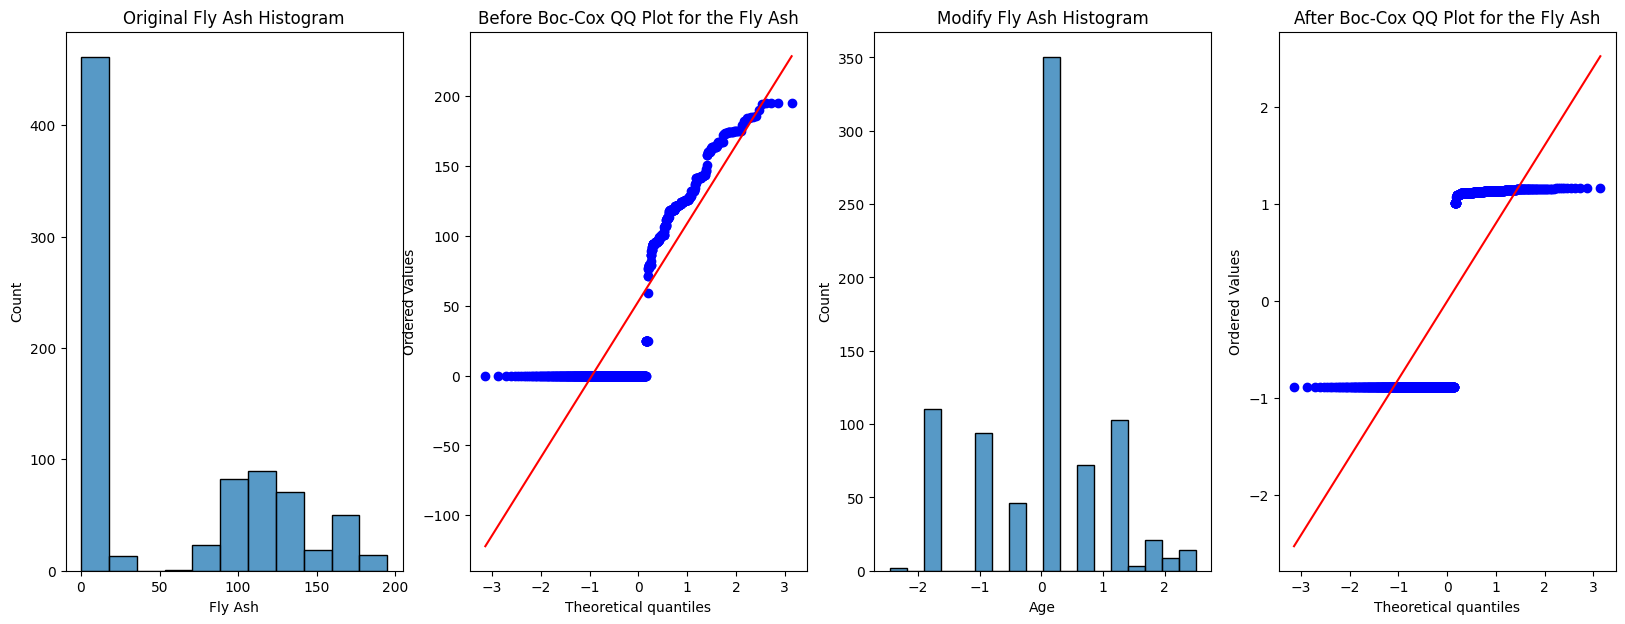

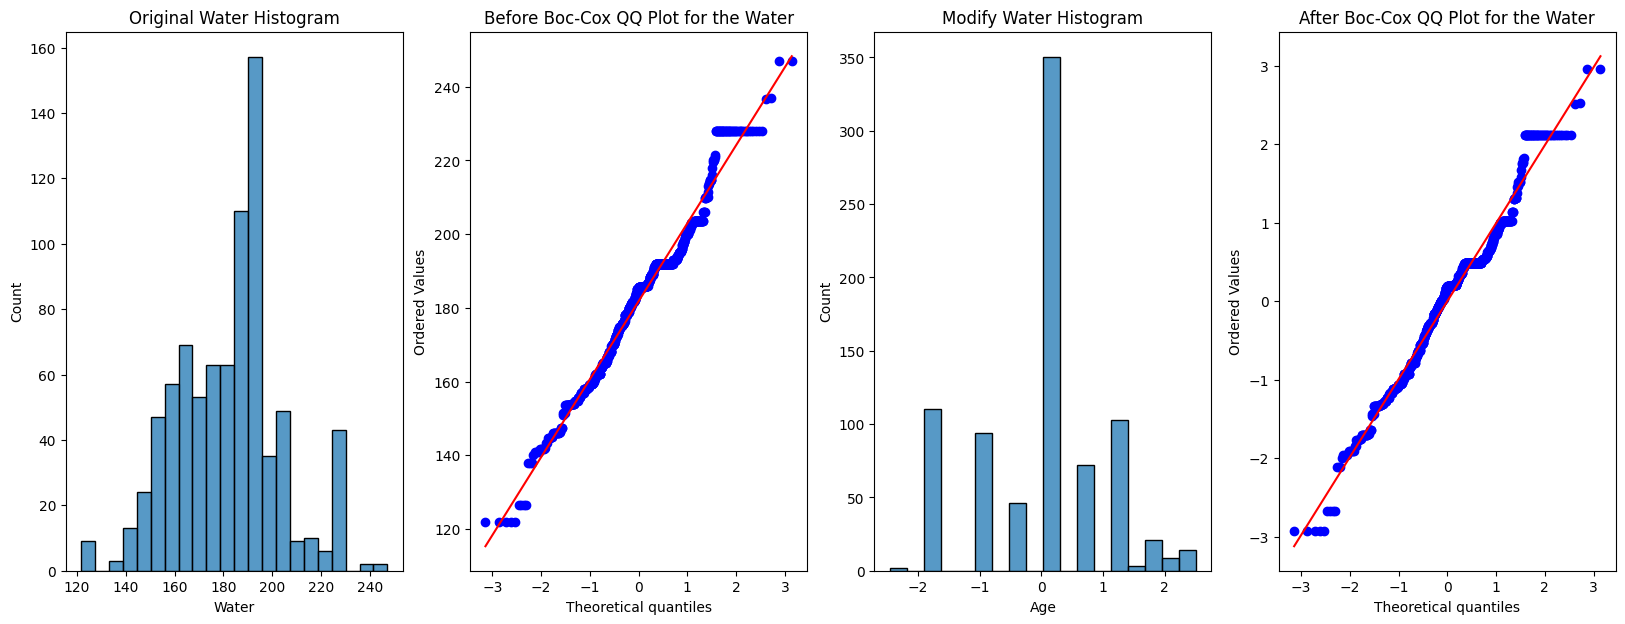

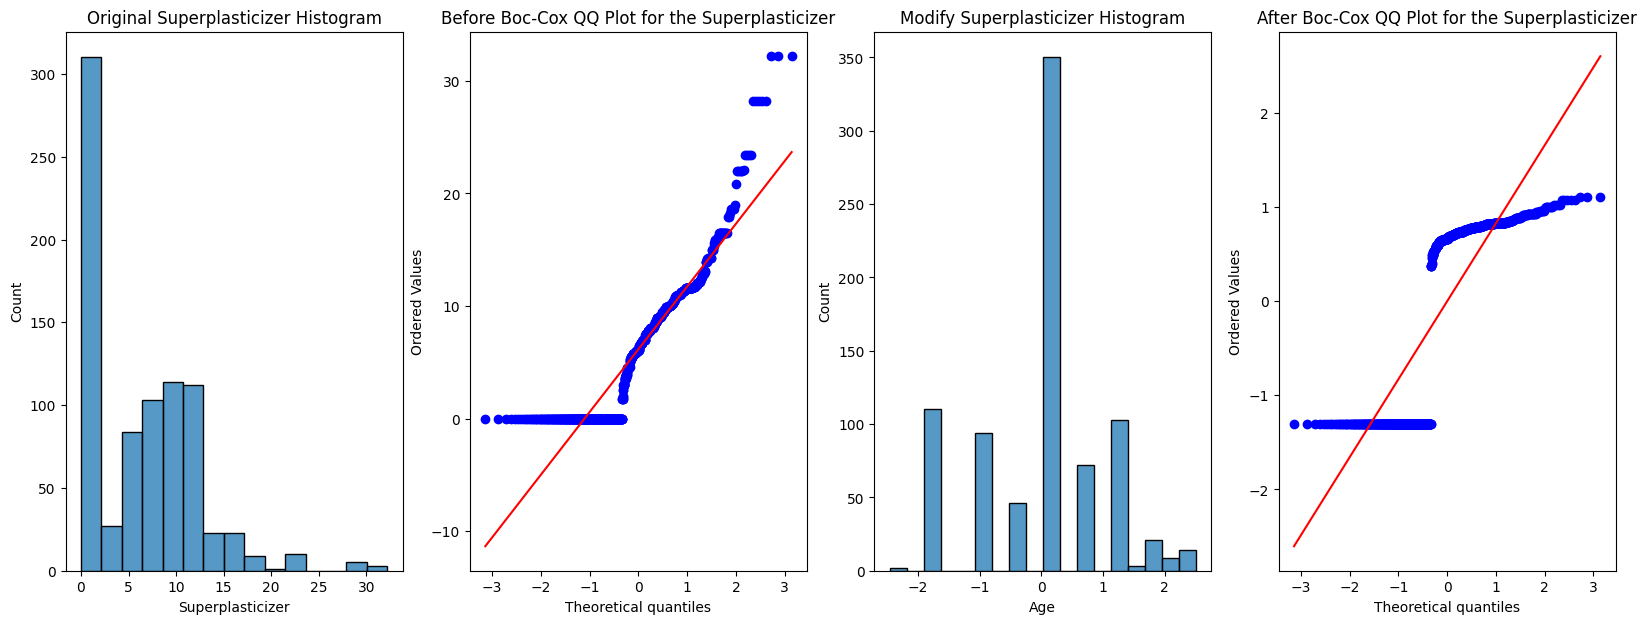

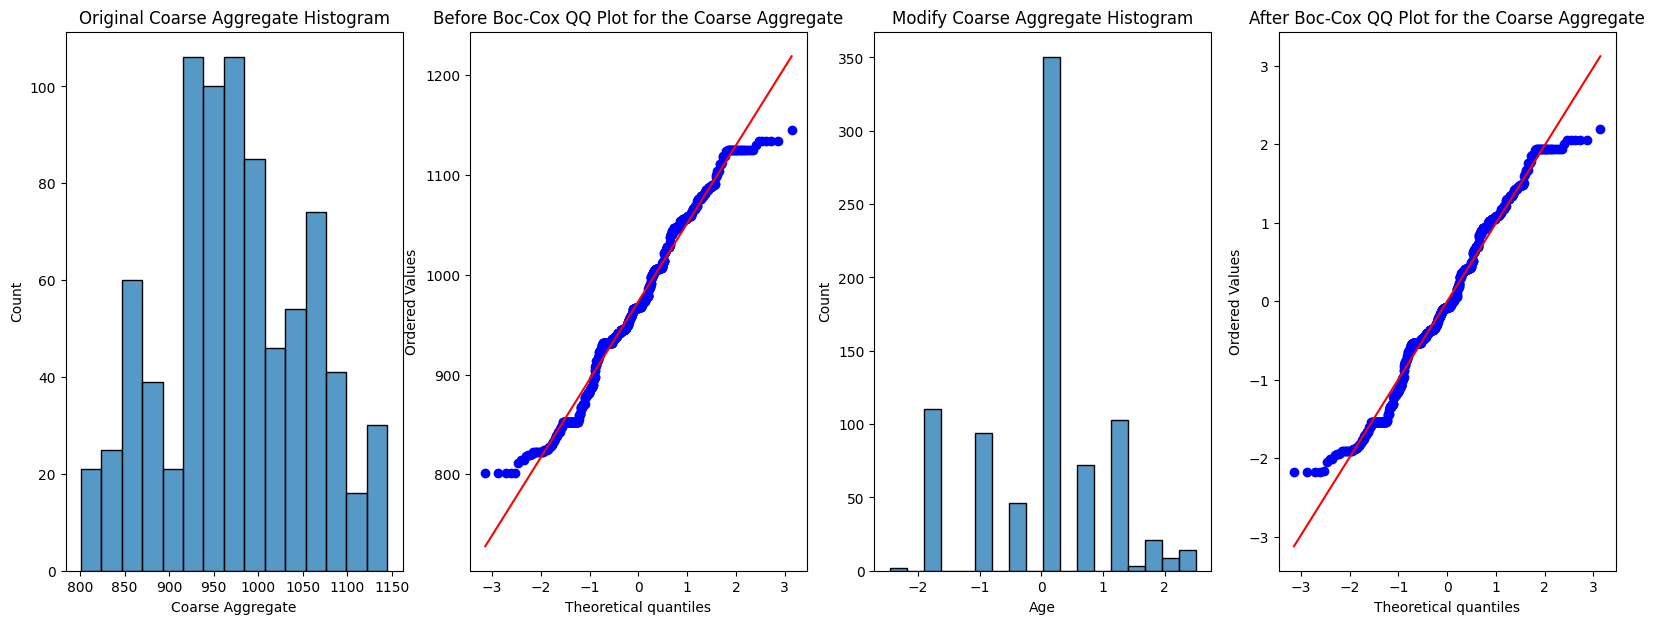

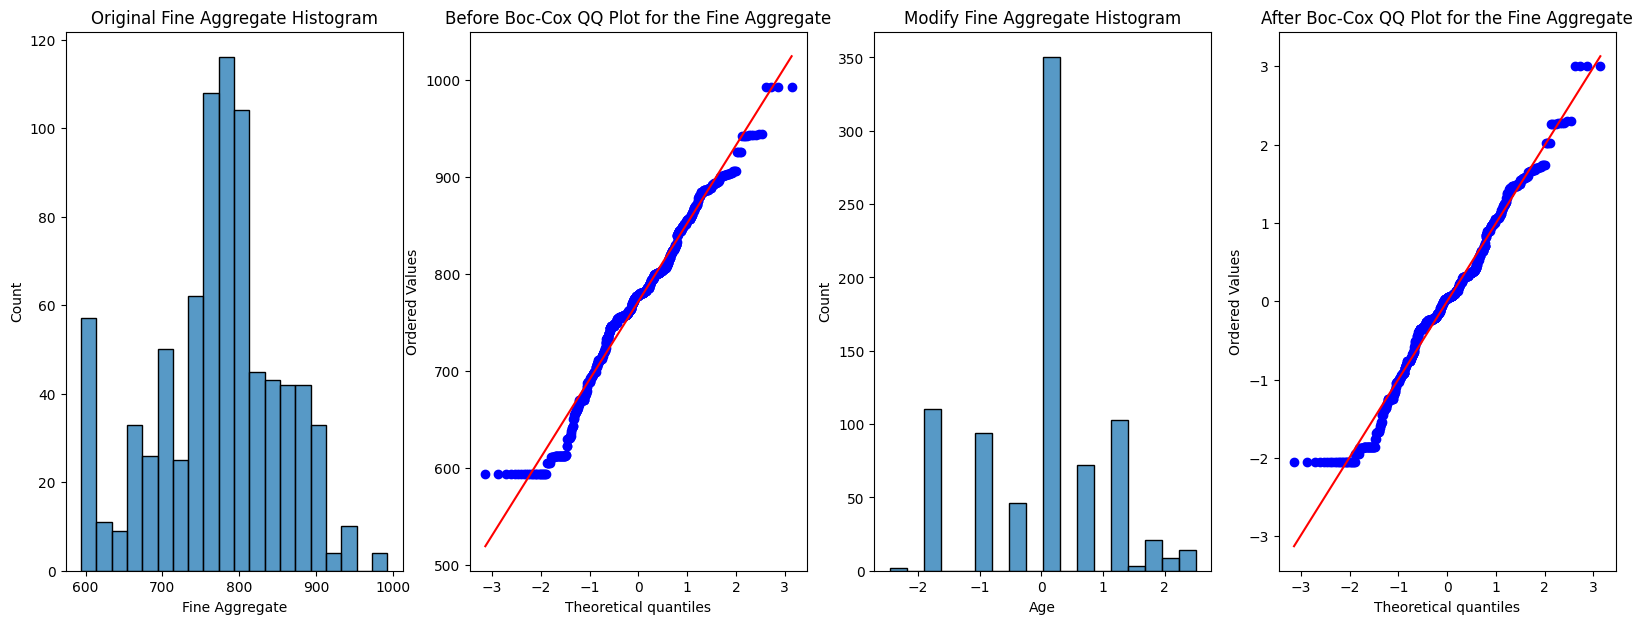

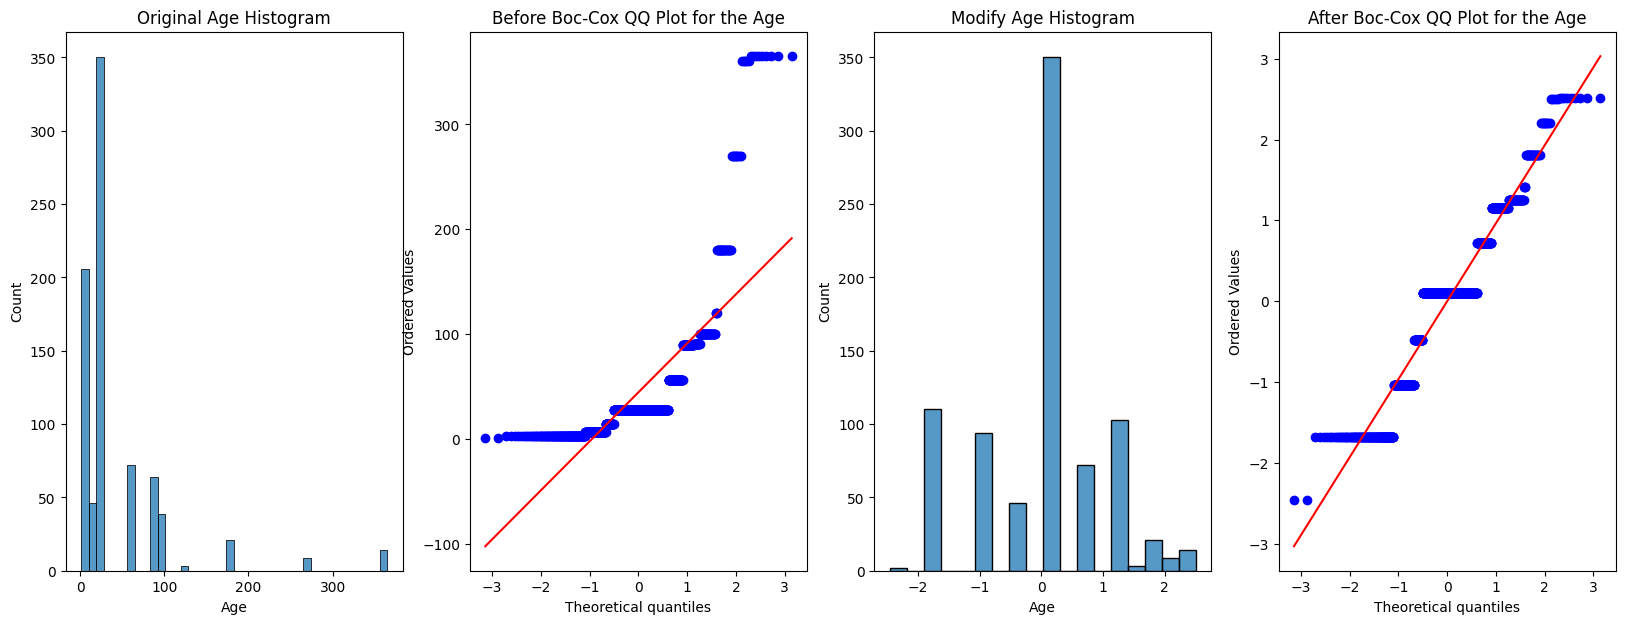

In [46]:
for cols in X_train_transformed.columns:
    plt.figure(figsize=(20, 7))
    
    plt.subplot(141)
    sns.histplot(X_train[cols])
    plt.title(f"Original {cols} Histogram")
    
    plt.subplot(142)
    stats.probplot(X_train[cols], dist='norm', plot=plt)
    plt.title(f"Before Boc-Cox QQ Plot for the {cols}")
    
    plt.subplot(143)
    sns.histplot(X_train_transformed[col])
    plt.title(f"Modify {cols} Histogram")
    
    plt.subplot(144)
    stats.probplot(X_train_transformed[cols], dist='norm', plot=plt)
    plt.title(f"After Boc-Cox QQ Plot for the {cols}")
    
    plt.show()

#  Apply Yeo-Johnson transform


In [49]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)


In [51]:

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

0.8161906513354853


In [53]:
pd.DataFrame(
    {
        'cols': X_train.columns,
        'box-cox-lambdas' : pt.lambdas_,
        'Yeo_johnson_lambadas': pt1.lambdas_
    }
)

,cols,box-cox-lambdas,Yeo_johnson_lambadas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.022924,0.015715
2,Fly Ash,-0.028797,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.087911,0.253935
5,Coarse Aggregate,1.129167,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885


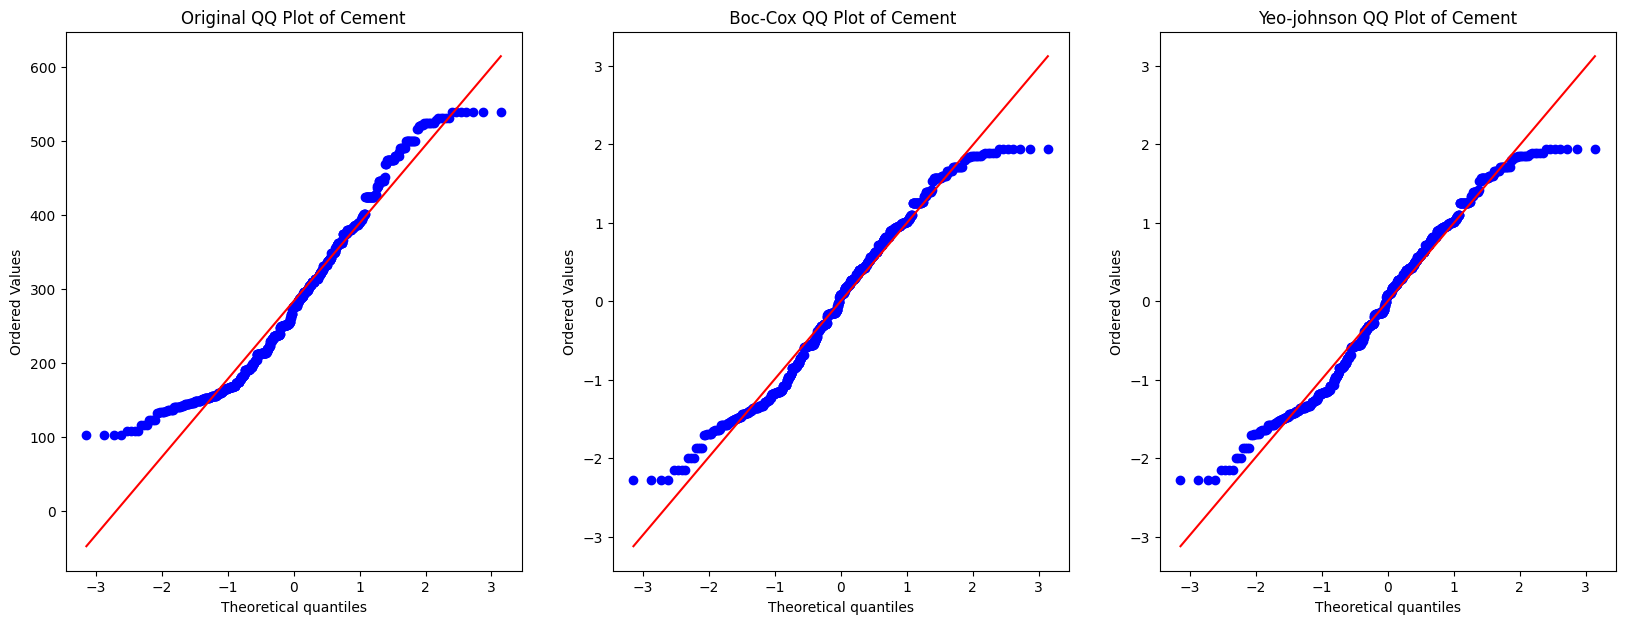

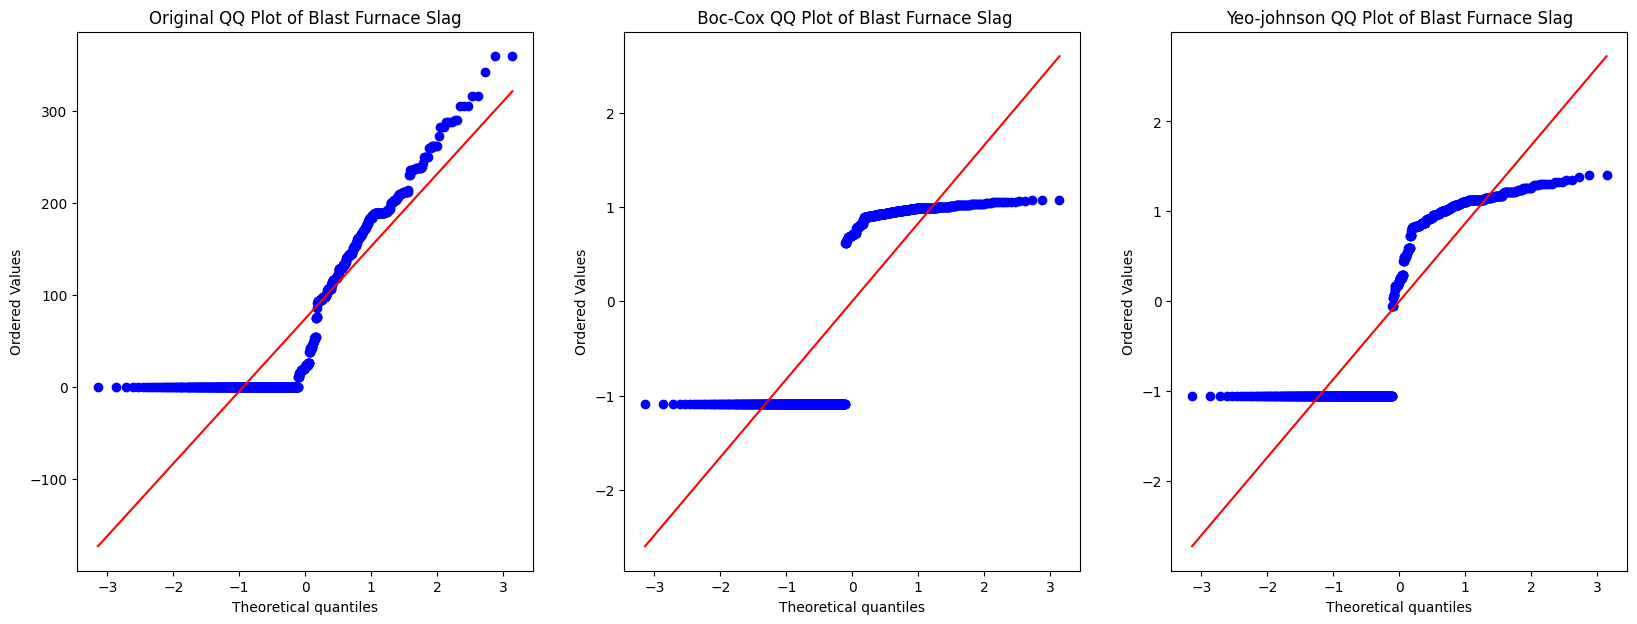

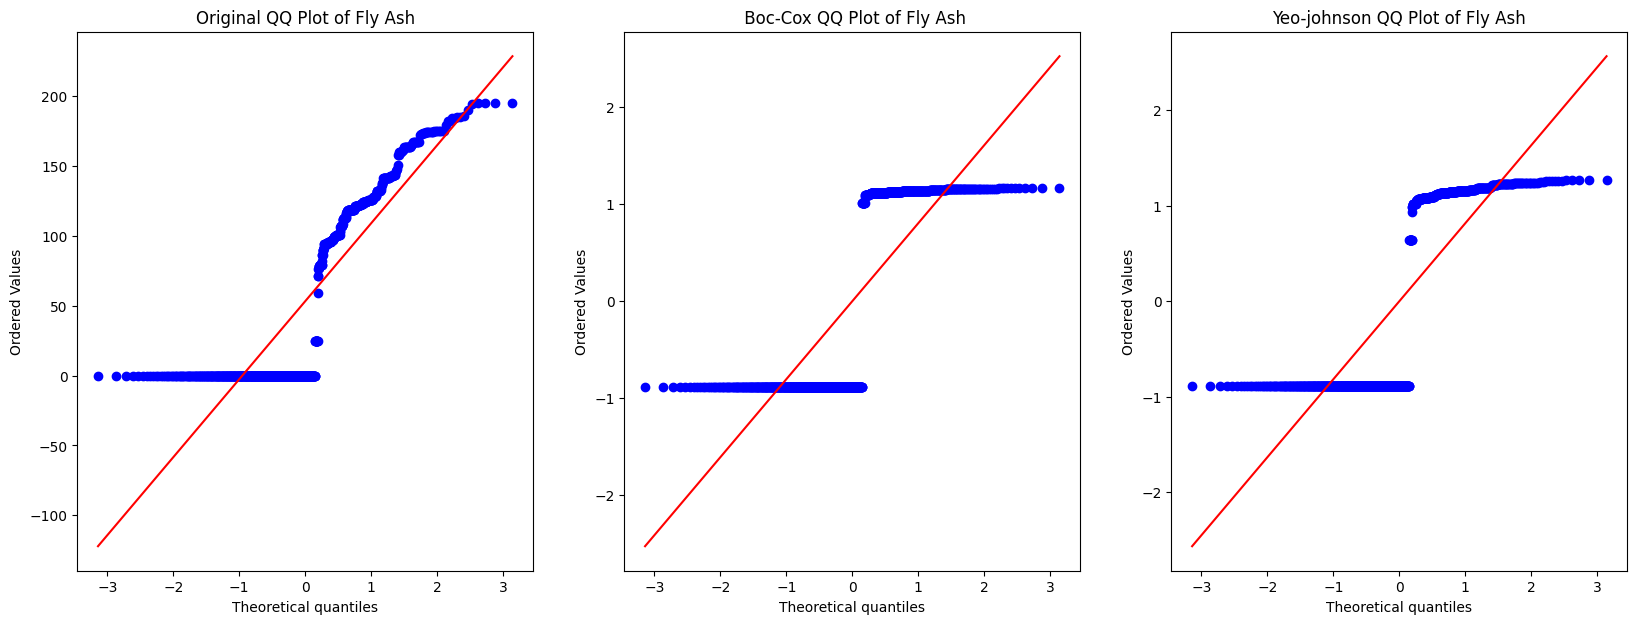

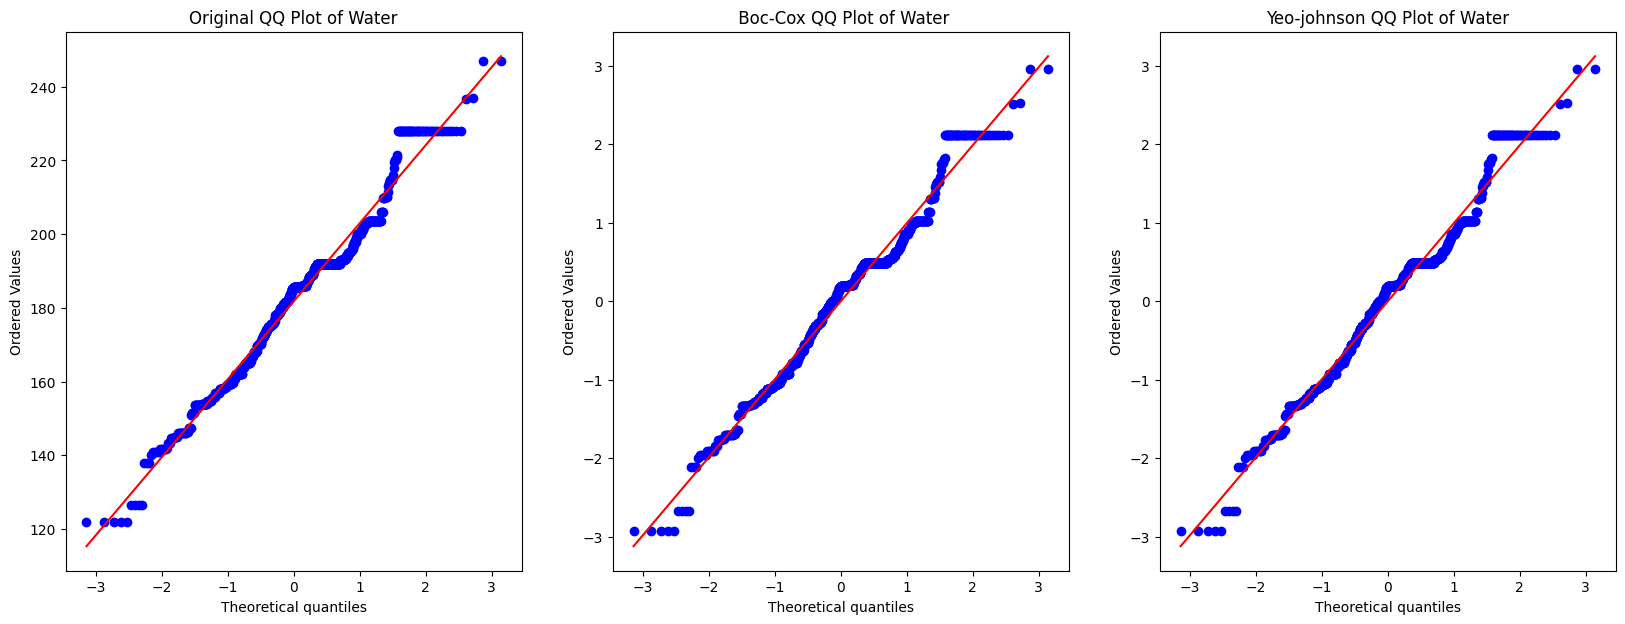

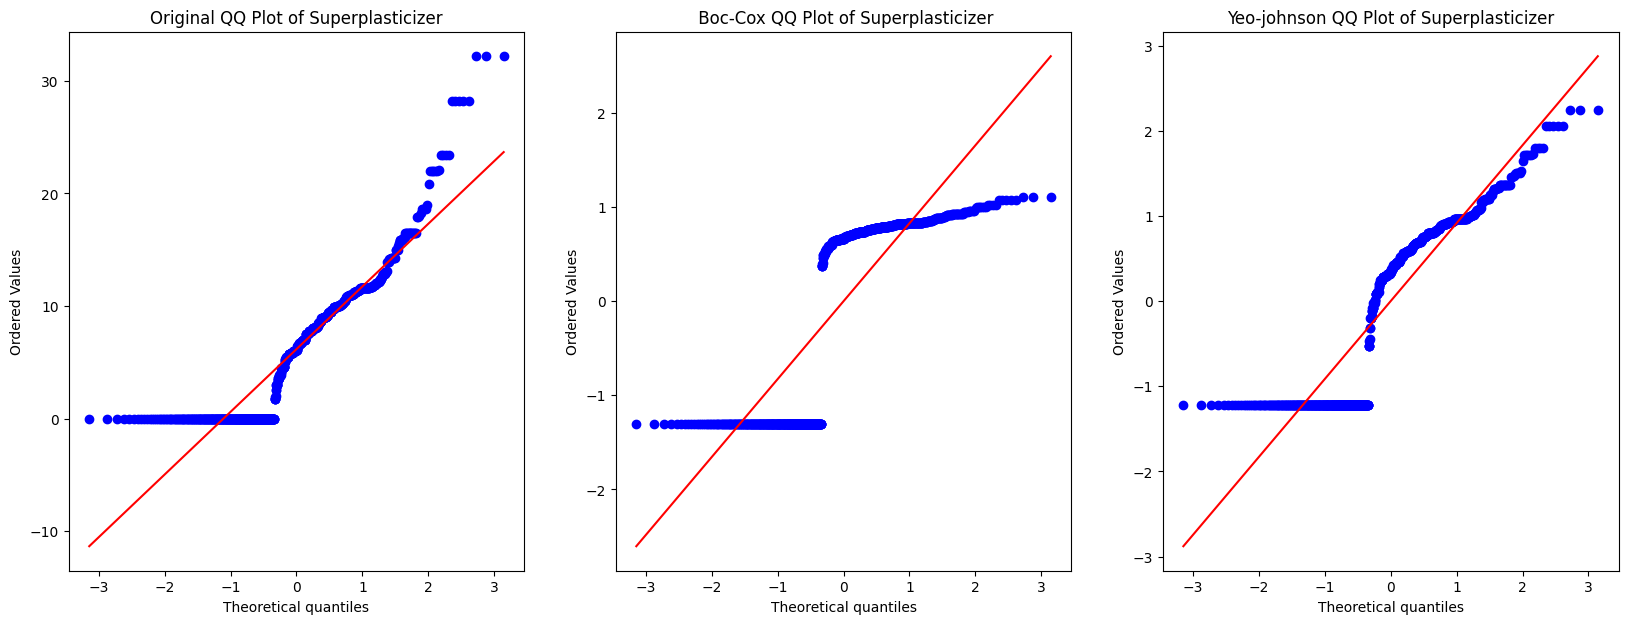

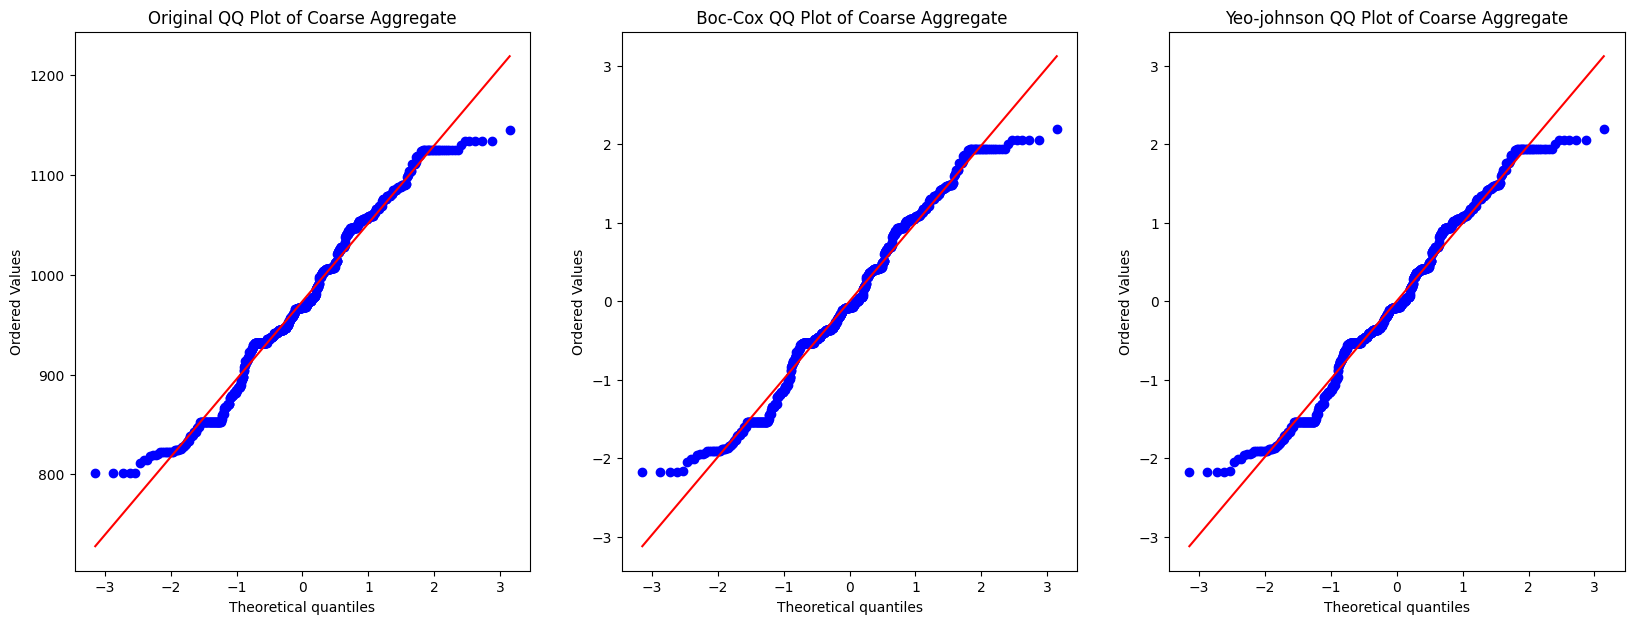

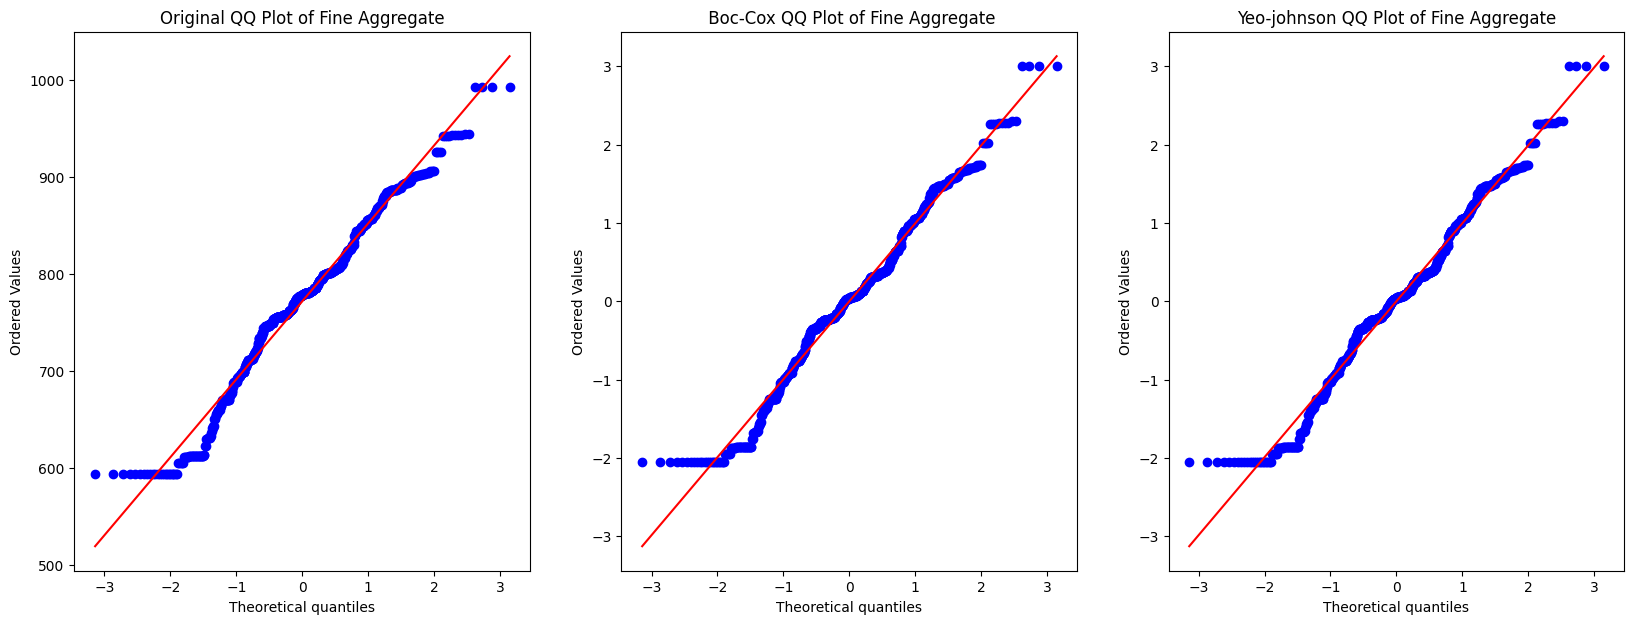

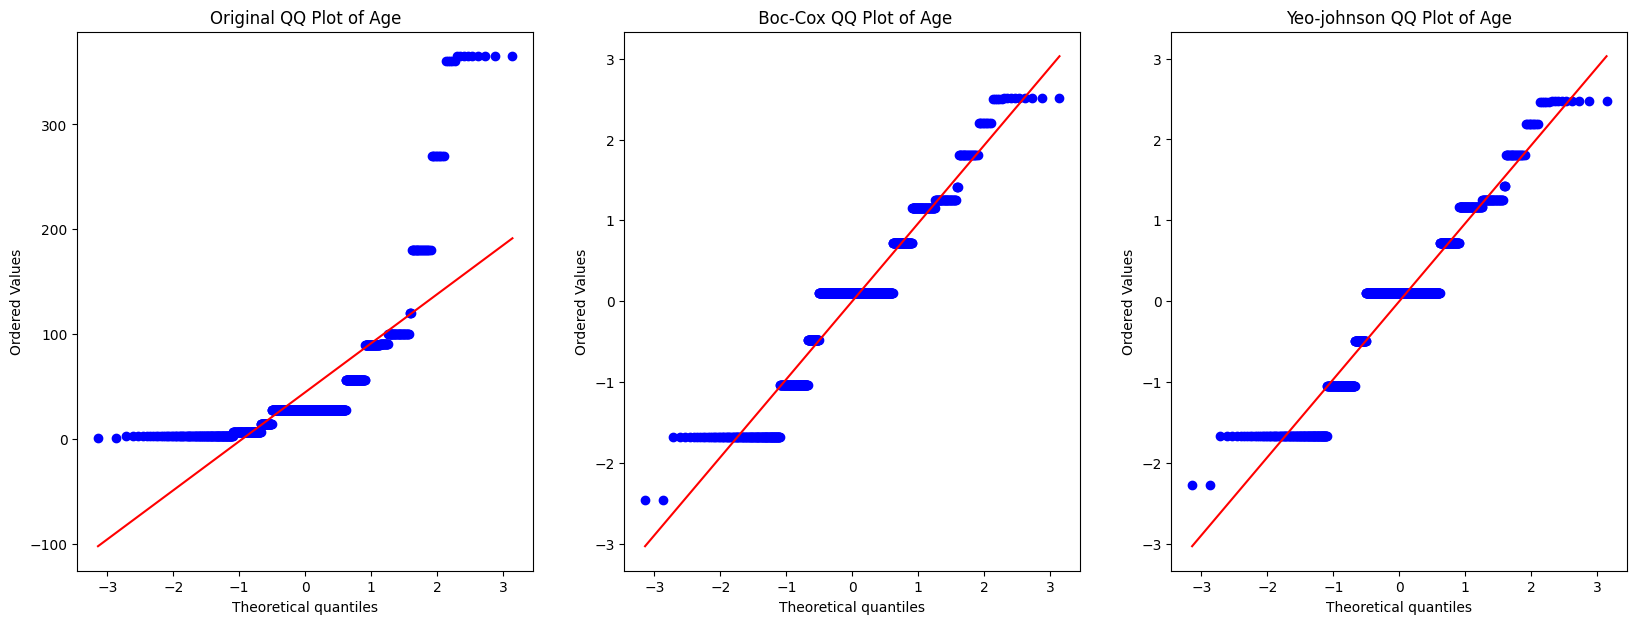

In [55]:
for cols in X_train_transformed.columns:
    plt.figure(figsize=(20, 7))
     
    plt.subplot(131)
    stats.probplot(X_train[cols], dist='norm', plot=plt)
    plt.title(f"Original QQ Plot of {cols}")
    
    plt.subplot(132)
    stats.probplot(X_train_transformed[cols], dist='norm', plot=plt)
    plt.title(f" Boc-Cox QQ Plot of {cols}")
    
    plt.subplot(133)
    stats.probplot(X_train_transformed2[cols], dist='norm', plot=plt)
    plt.title(f"Yeo-johnson QQ Plot of {cols}")
    
    plt.show()

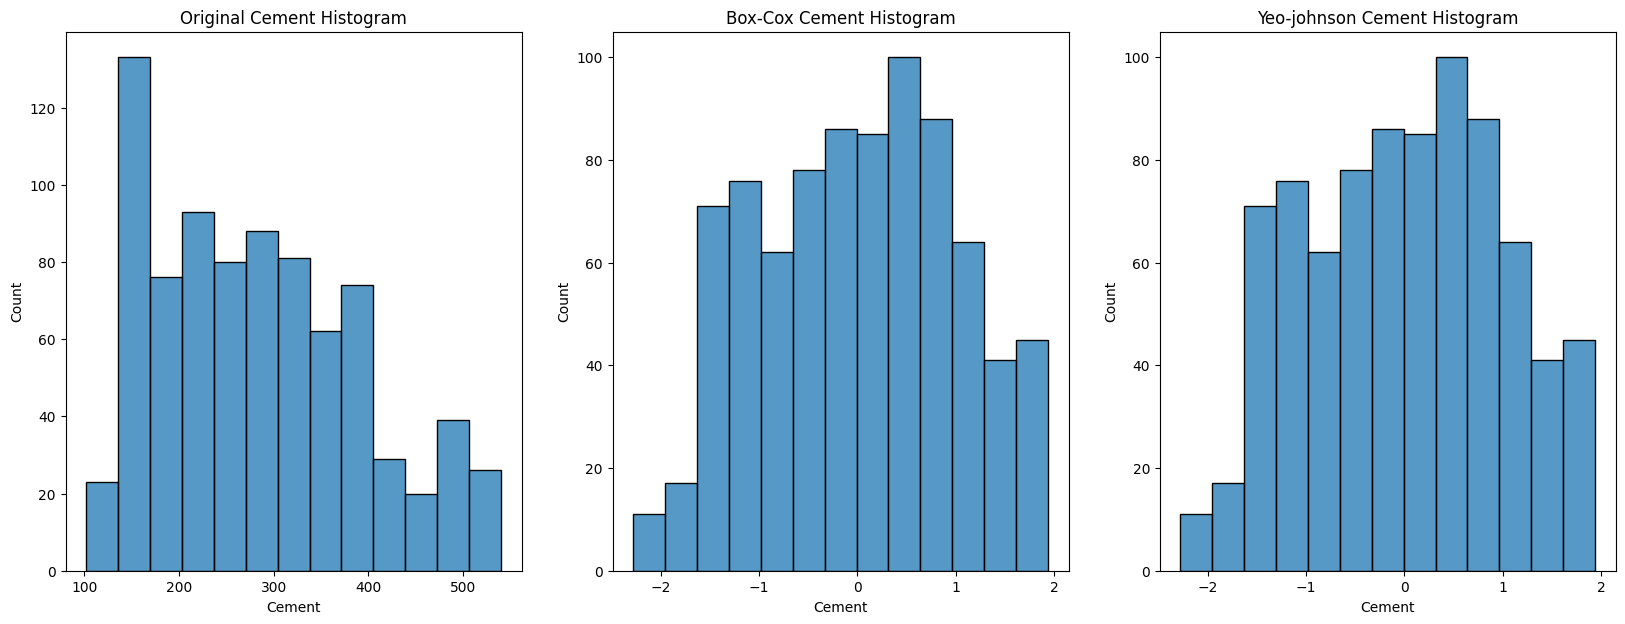

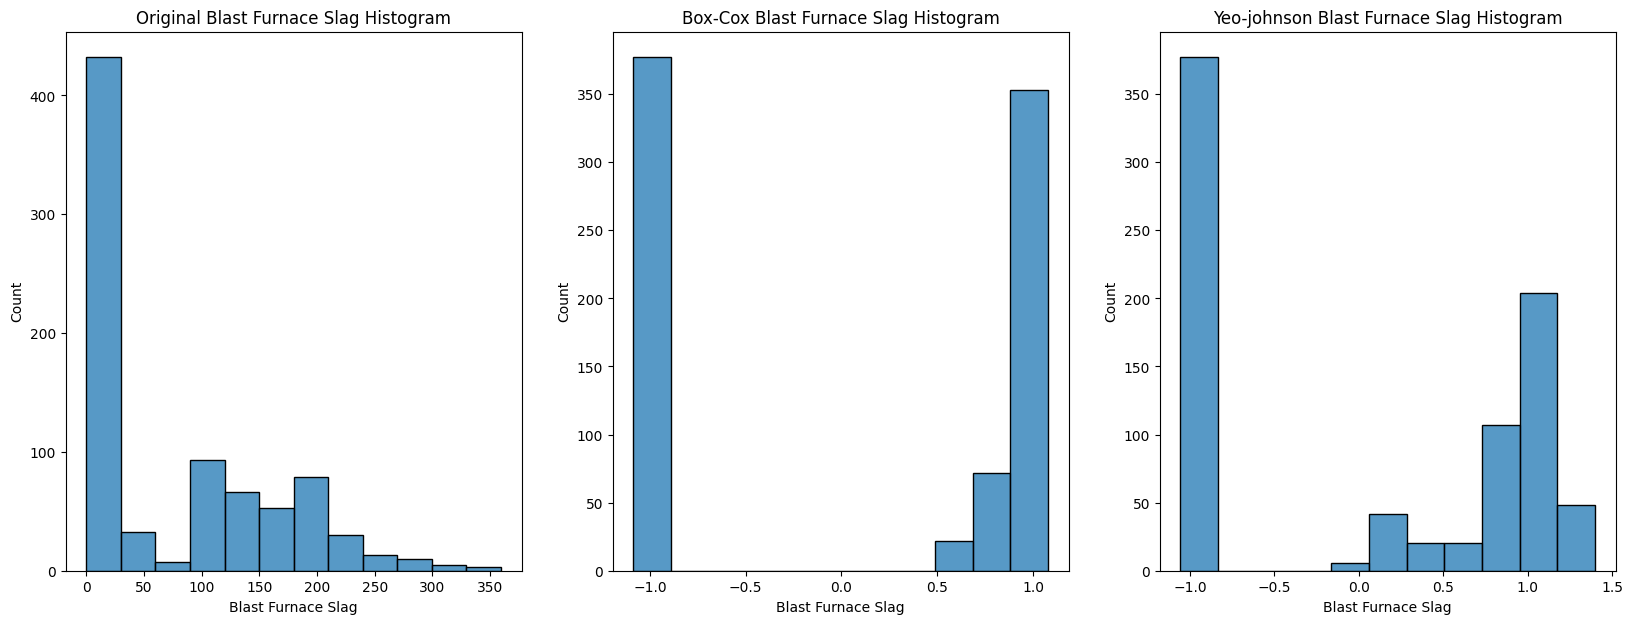

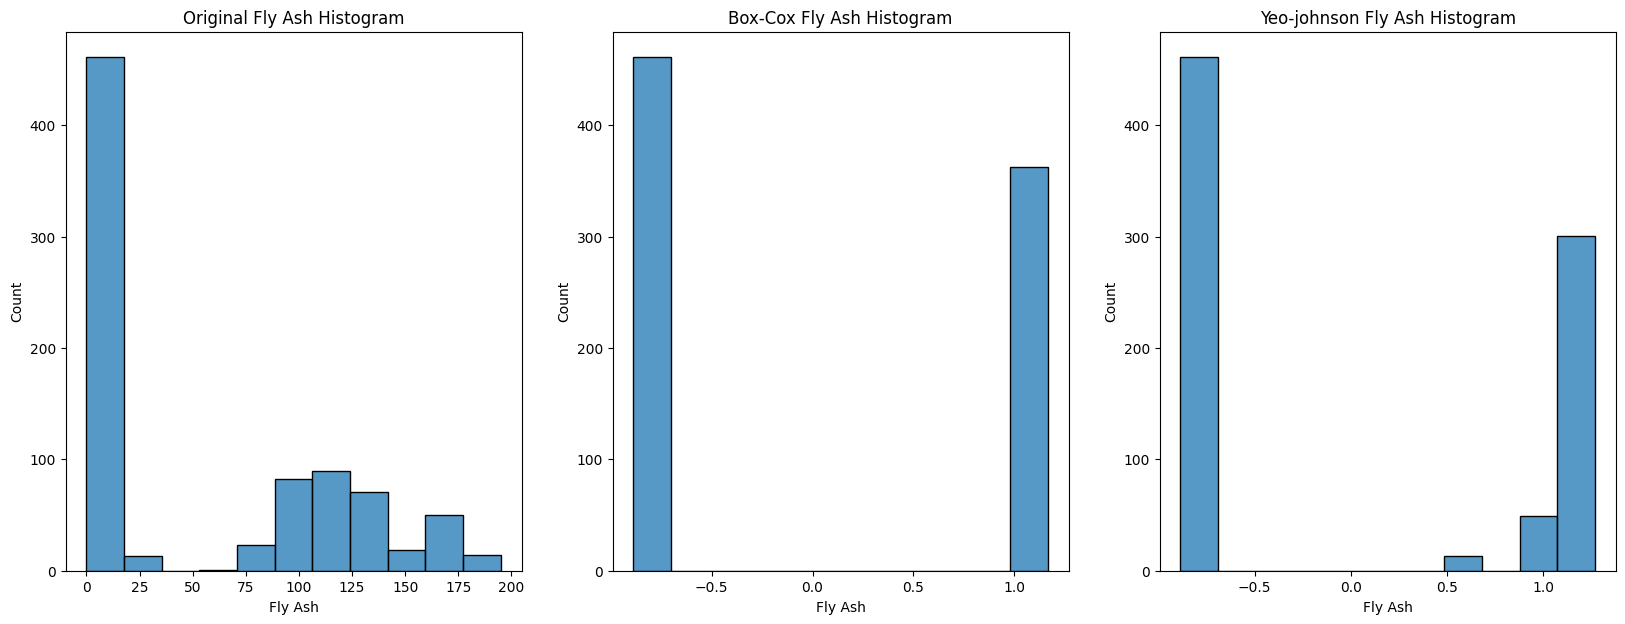

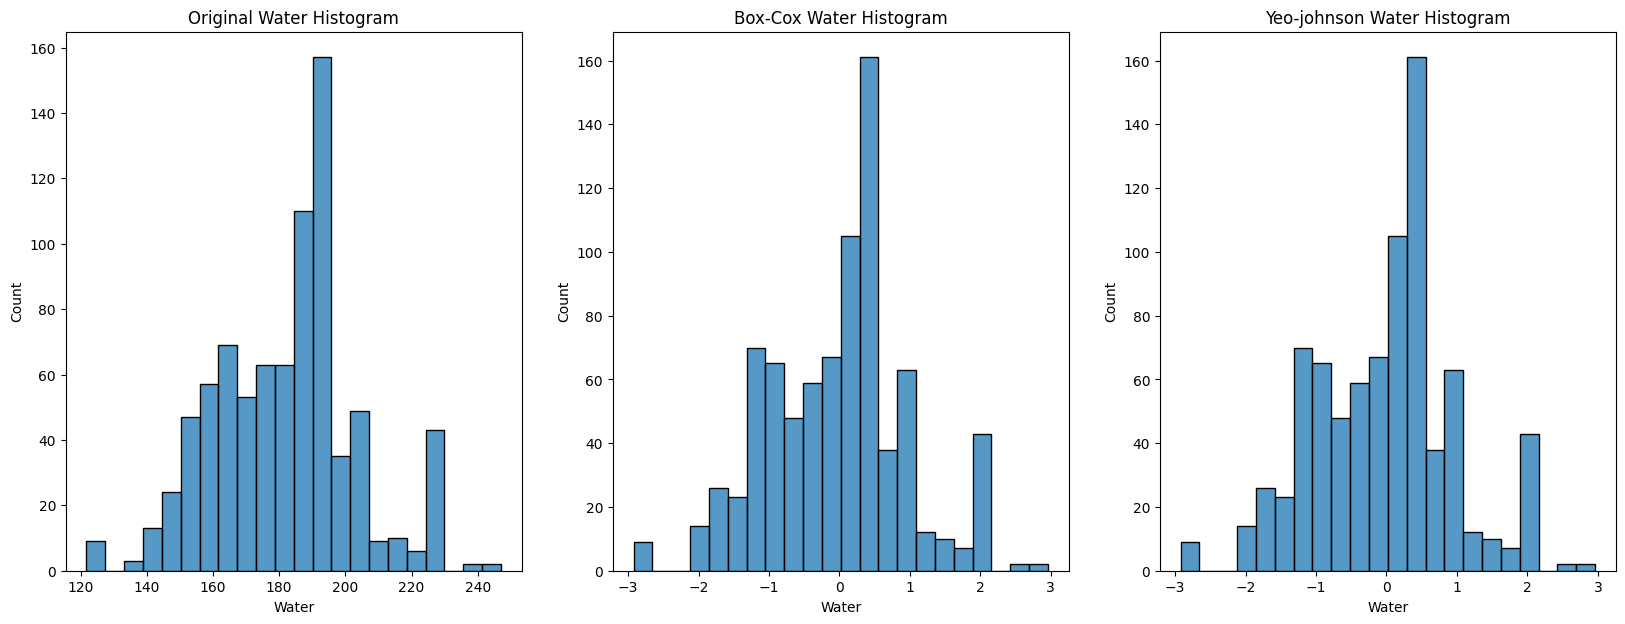

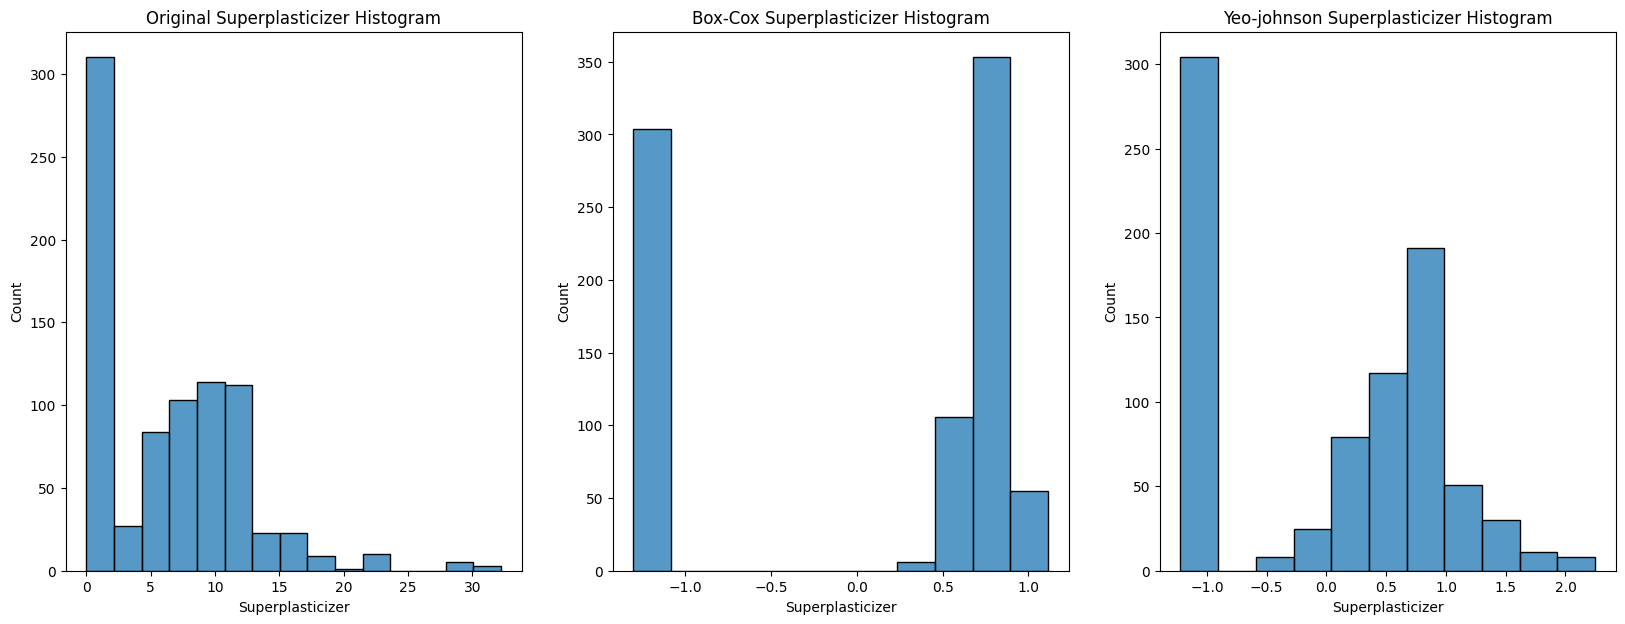

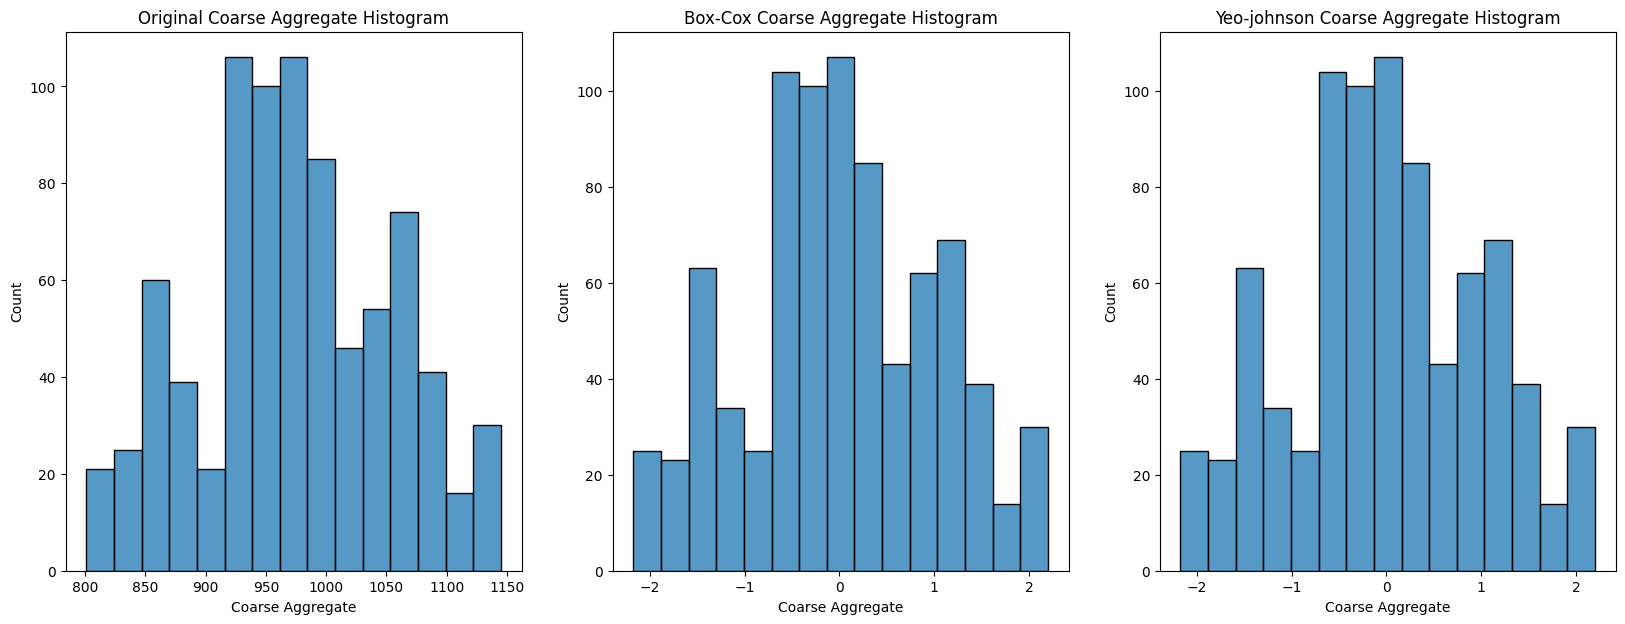

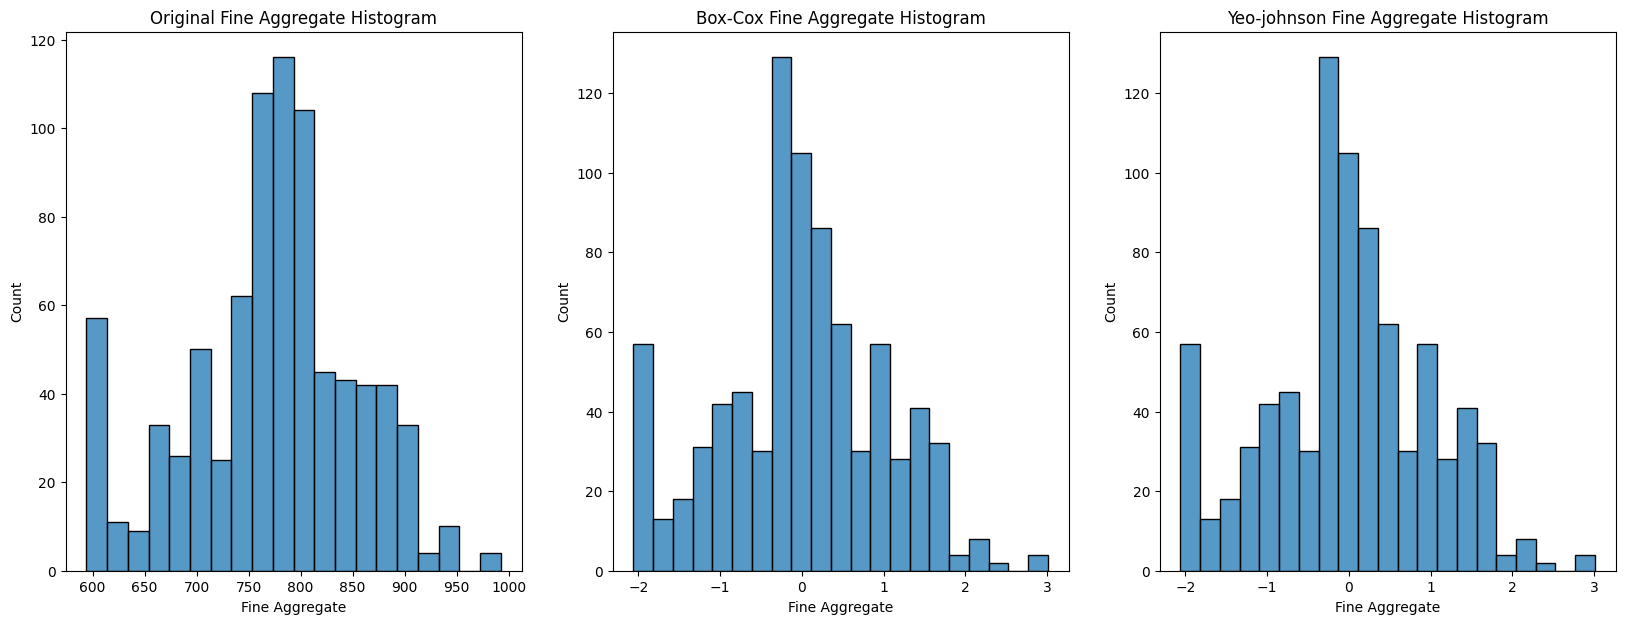

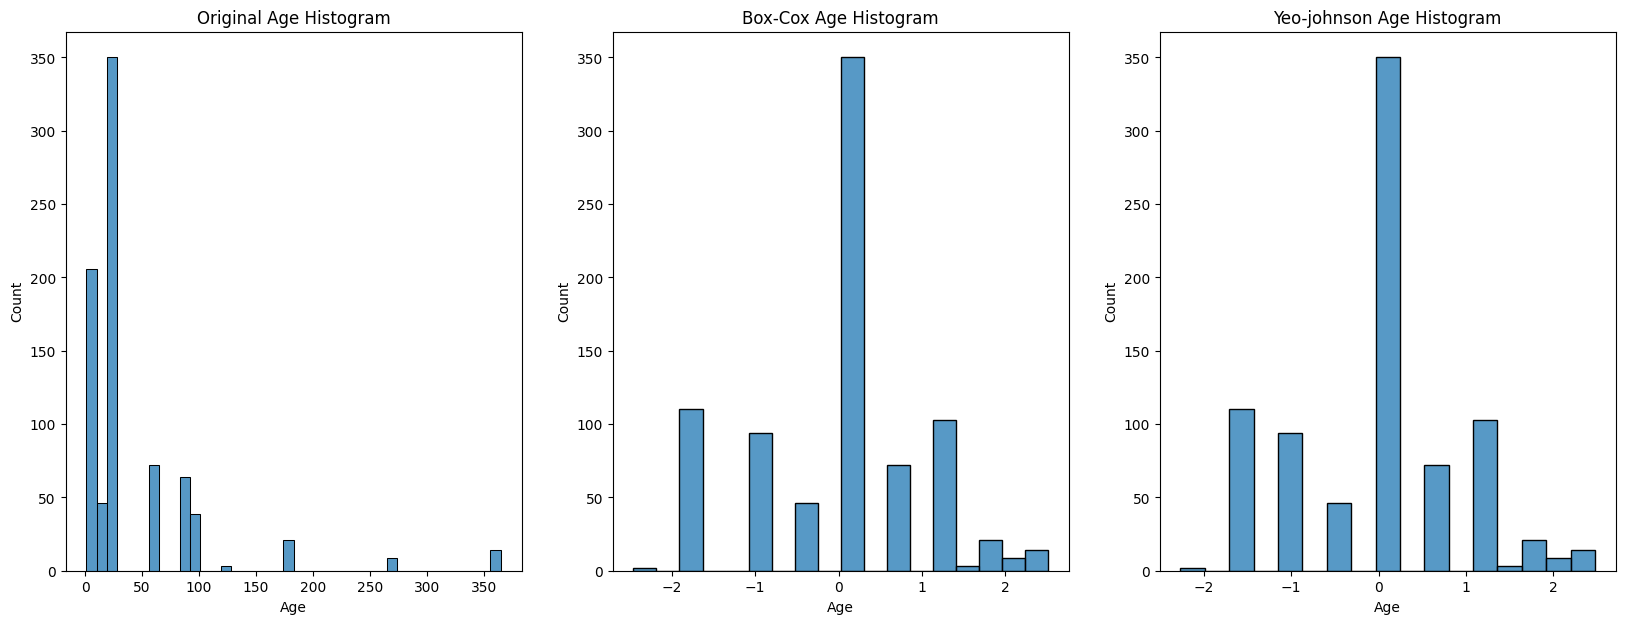

In [56]:
for cols in X_train_transformed.columns:
    plt.figure(figsize=(20, 7))
    
    plt.subplot(131)
    sns.histplot(X_train[cols])
    plt.title(f"Original {cols} Histogram")
   
    plt.subplot(132)
    sns.histplot(X_train_transformed[cols])
    plt.title(f"Box-Cox {cols} Histogram")
    
    plt.subplot(133)
    sns.histplot(X_train_transformed2[cols])
    plt.title(f"Yeo-johnson {cols} Histogram")
    
    plt.show()